# ECON 490: Exporting Regression Output (12)

## Prerequisites

1. Run OLS Regressions.

## Learning Outcomes

1. Being able to export regression output in a table. 
2. Being able to plot regression coefficients in a graph.


In [1]:
import stata_setup
stata_setup.config('C:\Program Files\Stata18/','se')

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\irene\AppData\Local\Temp\ipykernel_780\4069384911.py:2: SyntaxWarning: invalid escape sequence '\P'
  stata_setup.config('C:\Program Files\Stata18/','se')



  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 19 Aug 2024
Serial number: 401809301518
  Licensed to: Irene Berezin
               UBC

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [2]:
>>> import sys
>>> sys.path.append('/Applications/Stata/utilities') # make sure this is the same as what you set up in Module - 1, Section 1.5.1: Setting Up PyStata
>>> from pystata import config
>>> config.init('se')

## 12.1 Exporting regression output

When doing our project, presenting our results in a clear and organized manner is as important as obtaining the results themselves. Stata's output is very clear on the computer display, but at some point we need to "move" it from Stata to our draft. In this module, we will see how to save a regression output in a table.

Once again, we will be using the fictional dataset. Recall that this data is simulating information of workers in the years 1982-2012 in a fictional country where a training program was introduced in 2003 to boost their earnings.

Let's start by opening the dataset.

In [3]:
%%stata

* Load the dataset
clear *
use "fake_data.dta", clear


. 
. * Load the dataset
. clear *

. use "fake_data.dta", clear

. 


Imagine we are interested in estimating a multivariate regression of the following form

$$
\text{Earnings}_{it} = \alpha + \beta_1 \text{Age}_{it} + \beta_2 \text{Sex}_i + \varepsilon_{it}
$$

where $\text{Earnings}_{it}$ is the logarithm of earnings of individual $i$ at time $t$, $\text{Age}_{it}$ is the logarithm of age of individual $i$ at time $t$, and $\text{Sex}_i$ is a dummy variable equal to one if the sex of individual $i$ is female.

First, we create the variables we need.

In [4]:
%%stata

* Create the variables
gen logearn = log(earnings)
gen logage = log(age)
gen sexdummy = 1 if sex == "F"
replace sexdummy = 0 if missing(sexdummy)


. 
. * Create the variables
. gen logearn = log(earnings)

. gen logage = log(age)

. gen sexdummy = 1 if sex == "F"
(107,619 missing values generated)

. replace sexdummy = 0 if missing(sexdummy)
(107,619 real changes made)

. 


Then, we can estimate our specification using the command `reg`. We have seen how to do it in [Module 11](econometrics/econ490-stata/11_Linear_Reg.ipynb). 

In [5]:
%%stata

reg logearn logage sexdummy


. 
. reg logearn logage sexdummy

      Source |       SS           df       MS      Number of obs   =   138,138
-------------+----------------------------------   F(2, 138135)    =   3053.37
       Model |  7609.63113         2  3804.81556   Prob > F        =    0.0000
    Residual |  172130.664   138,135  1.24610463   R-squared       =    0.0423
-------------+----------------------------------   Adj R-squared   =    0.0423
       Total |  179740.295   138,137  1.30117416   Root MSE        =    1.1163

------------------------------------------------------------------------------
     logearn | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      logage |   .2200076   .0180988    12.16   0.000     .1845343    .2554809
    sexdummy |  -.5399264   .0074048   -72.92   0.000    -.5544397   -.5254132
       _cons |   9.962268   .0691335   144.10   0.000     9.826767    10.09777
----------------

There are different options available to export this table to another file. In this module, we will use `etable`, a command available by default in Stata 17 and subsequent versions.

`etable` can take several options. In its simplest specification, we just need to type `etable, export(filename)` after fitting a model to save a table in a file named *filename*. We can use files of Microsoft Word, Microsoft Excel, LATEX, Markdown, or PDF, but we need to specify the right extension.

For example, let's save our results in a Microsoft Word file named *table.docx*.

In [6]:
%%stata

reg logearn logage sexdummy
etable, export(table.docx)


. 
. reg logearn logage sexdummy

      Source |       SS           df       MS      Number of obs   =   138,138
-------------+----------------------------------   F(2, 138135)    =   3053.37
       Model |  7609.63113         2  3804.81556   Prob > F        =    0.0000
    Residual |  172130.664   138,135  1.24610463   R-squared       =    0.0423
-------------+----------------------------------   Adj R-squared   =    0.0423
       Total |  179740.295   138,137  1.30117416   Root MSE        =    1.1163

------------------------------------------------------------------------------
     logearn | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      logage |   .2200076   .0180988    12.16   0.000     .1845343    .2554809
    sexdummy |  -.5399264   .0074048   -72.92   0.000    -.5544397   -.5254132
       _cons |   9.962268   .0691335   144.10   0.000     9.826767    10.09777
----------------

A file named *table.docx* should appear in your folder. Notice that this worked, but our table does not have a very professional appearance yet. We can add more options to the command `etable` to make our results more clear and organized.
Here are some of the options we can add:
- we can add more statistics, such as the number of observations (*N*), the R$^2$ (*r2*), the adjusted R$^2$ (*r2_a*), and the F statistic (*F*), with the option `mstat(N)`, `mstat(r2)`, `mstat(r2_a)`, and `mstat(F)`; 
- we can add a title *titlename* with the option `title(titlename)`;
- we can show the stars indicating the level of significance of our coefficients with the option `showstars` and add a footnote explaining them with `showstarsnote`;
- for the coefficients, we can display the variable labels instead of their names by adding the option `varlabel`;
- for the dependent variable, we can display its variable label instead of its name by adding the option `column(dvlabel)`;
- we can show only some coefficients, by including them in `keep(coeffnames)`. For example, we can show only the coefficients for age and sex by adding the option `keep(logage sexdummy)`.

Let's try all of them in practice. Notice that now we add the option *replace* when we save the file because there is already a Microsoft Word file named *table.docx*: `export(table.docx, replace)`.

In [8]:
%%stata

* Add labels to variables
label var logearn "Earnings (ln)"
label var logage "Age (ln)"
label var sexdummy "Female"

* Run regression
reg logearn logage sexdummy

* Store results
etable, export(table.docx, replace) mstat(N) mstat(r2_a) title(Earnings) showstars showstarsnote keep(logage sexdummy) varlabel column(dvlabel)


. 
. * Add labels to variables
. label var logearn "Earnings (ln)"

. label var logage "Age (ln)"

. label var sexdummy "Female"

. 
. * Run regression
. reg logearn logage sexdummy

      Source |       SS           df       MS      Number of obs   =   138,138
-------------+----------------------------------   F(2, 138135)    =   3053.37
       Model |  7609.63113         2  3804.81556   Prob > F        =    0.0000
    Residual |  172130.664   138,135  1.24610463   R-squared       =    0.0423
-------------+----------------------------------   Adj R-squared   =    0.0423
       Total |  179740.295   138,137  1.30117416   Root MSE        =    1.1163

------------------------------------------------------------------------------
     logearn | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      logage |   .2200076   .0180988    12.16   0.000     .1845343    .2554809
    sexdummy |  -.5399264

This is way nicer, but what if we want to show the results of multiple models in the same table?
Suppose we want to first estimate a model with only *Age* or only *Sex* as an explanatory variable, and then a multivariate model encompassing both. In this case, we only need to store the results of each model using the command `estimates store`.

In the example below, we store the three models in objects *model1*, *model2*, and *model3*.

In [9]:
%%stata

* Store first regression in model1
regress logearn logage
estimates store model1

* Store second regression in model2
regress logearn sexdummy
estimates store model2

* Store third regression in model3
regress logearn logage sexdummy
estimates store model3


. 
. * Store first regression in model1
. regress logearn logage

      Source |       SS           df       MS      Number of obs   =   138,138
-------------+----------------------------------   F(1, 138136)    =    760.74
       Model |  984.444294         1  984.444294   Prob > F        =    0.0000
    Residual |  178755.851   138,136  1.29405695   R-squared       =    0.0055
-------------+----------------------------------   Adj R-squared   =    0.0055
       Total |  179740.295   138,137  1.30117416   Root MSE        =    1.1376

------------------------------------------------------------------------------
     logearn | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      logage |   .4973466   .0180319    27.58   0.000     .4620045    .5326887
       _cons |   8.790158   .0685202   128.29   0.000     8.655859    8.924456
---------------------------------------------------------------

Now, we can export all the objects in one single table by calling their names in the options `estimates()`.

In [10]:
%%stata

etable, estimates(model1 model2 model3) mstat(N) mstat(r2_a) showstars showstarsnote varlabel column(dvlabel) export(table.docx, replace)


. 
. etable, estimates(model1 model2 model3) mstat(N) mstat(r2_a) showstars showst
> arsnote varlabel column(dvlabel) export(table.docx, replace)

----------------------------------------------------------------
                       Earnings (ln) Earnings (ln) Earnings (ln)
----------------------------------------------------------------
Age (ln)                   0.497 **                    0.220 ** 
                         (0.018)                     (0.018)    
Female                                  -0.559 **     -0.540 ** 
                                       (0.007)       (0.007)    
Intercept                  8.790 **     10.802 **      9.962 ** 
                         (0.069)       (0.003)       (0.069)    
Number of observations    138138        138138        138138    
Adjusted R-squared          0.01          0.04          0.04    
----------------------------------------------------------------
** p<.01, * p<.05
(collection ETable exported to file table.docx)

. 


## 12.2 Plotting regression coefficients

Visual representations can be better than tables. Sometimes we need to plot our estimated coefficients and their confidence intervals. 
In Stata, this is easily done with command `coefplot`. The graphs obtained with `coefplot` are easy to customize. In its simplest use, we only need to run `coefplot` right after our regression.

<div class="alert alert-info">

**Note:** You will need to install command `coefplot` from the SSC Archive the first time you use it on your local computer. To do so, type `ssc install coefplot`.
    
</div>

Once again, let's try it on our multivariate model. We can omit the constant by adding the option `drop(_cons)`. Remember to save the graph.


. 
. regress logearn logage sexdummy

      Source |       SS           df       MS      Number of obs   =   138,138
-------------+----------------------------------   F(2, 138135)    =   3053.37
       Model |  7609.63113         2  3804.81556   Prob > F        =    0.0000
    Residual |  172130.664   138,135  1.24610463   R-squared       =    0.0423
-------------+----------------------------------   Adj R-squared   =    0.0423
       Total |  179740.295   138,137  1.30117416   Root MSE        =    1.1163

------------------------------------------------------------------------------
     logearn | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      logage |   .2200076   .0180988    12.16   0.000     .1845343    .2554809
    sexdummy |  -.5399264   .0074048   -72.92   0.000    -.5544397   -.5254132
       _cons |   9.962268   .0691335   144.10   0.000     9.826767    10.09777
------------

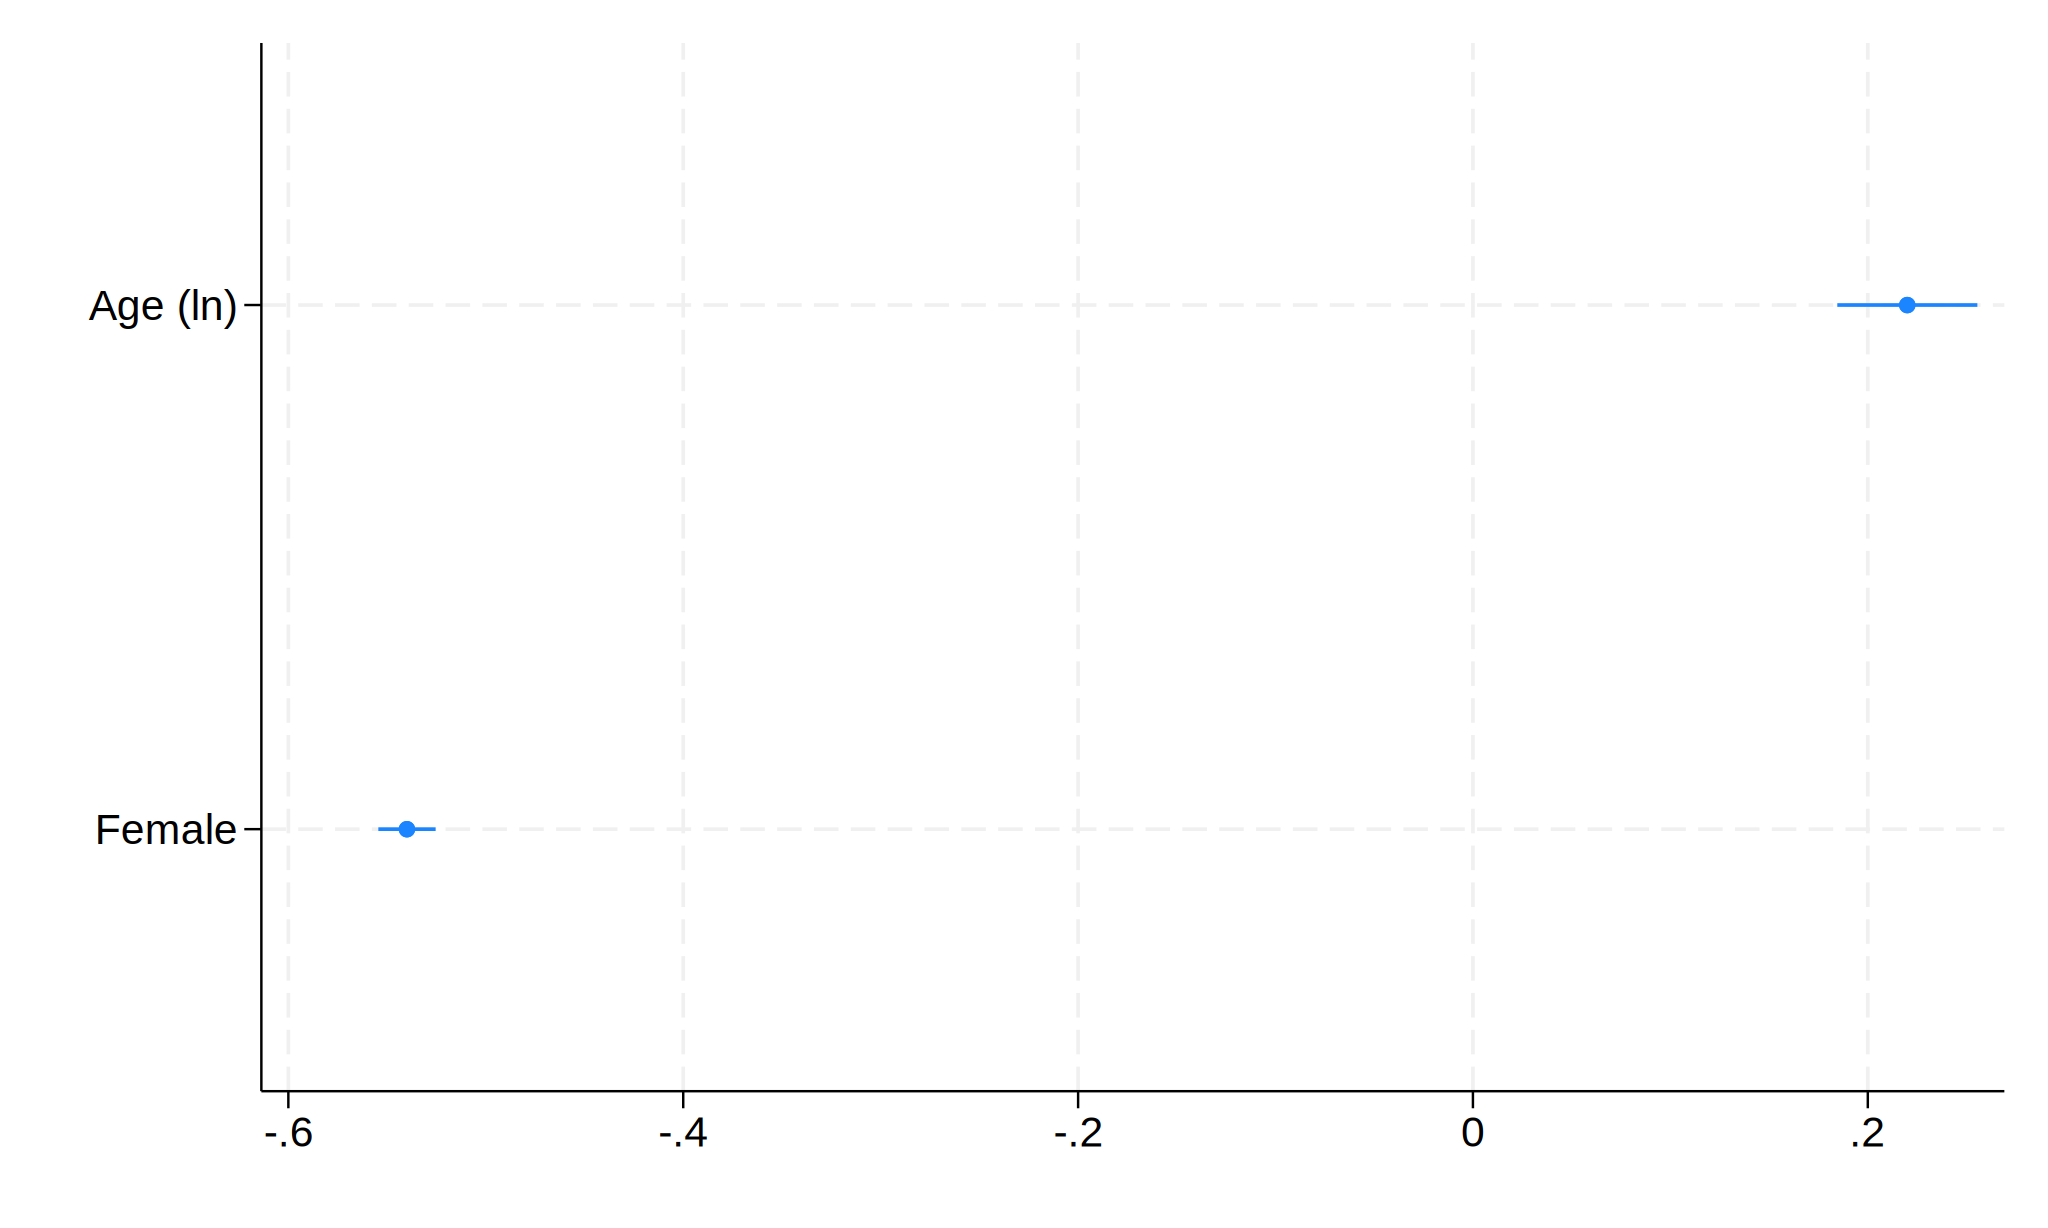

In [11]:
%%stata

regress logearn logage sexdummy
coefplot, drop(_cons)
graph export graph1.jpg, as(jpg) replace

Since it is a graph, we can add most of the options that we have seen in [Module 9](econometrics/econ490-stata/9_Stata_Graphs.ipynb). For example, we can change the color of the background from light blue to white with the option `graphregion(color(white))`.

There are some options that are specific to `coefplot`. By default confidence intervals are drawn at 95% significance levels. We can specify different and multiple levels in the option `levels()`. For example, we can show both the 95% and 99.9% confidence intervals with `levels(99.9 95)`. 
Additionally, we can use a vertical layout with the option `vertical`.

Let's apply these options to our example.


. 
. regress logearn logage sexdummy

      Source |       SS           df       MS      Number of obs   =   138,138
-------------+----------------------------------   F(2, 138135)    =   3053.37
       Model |  7609.63113         2  3804.81556   Prob > F        =    0.0000
    Residual |  172130.664   138,135  1.24610463   R-squared       =    0.0423
-------------+----------------------------------   Adj R-squared   =    0.0423
       Total |  179740.295   138,137  1.30117416   Root MSE        =    1.1163

------------------------------------------------------------------------------
     logearn | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      logage |   .2200076   .0180988    12.16   0.000     .1845343    .2554809
    sexdummy |  -.5399264   .0074048   -72.92   0.000    -.5544397   -.5254132
       _cons |   9.962268   .0691335   144.10   0.000     9.826767    10.09777
------------

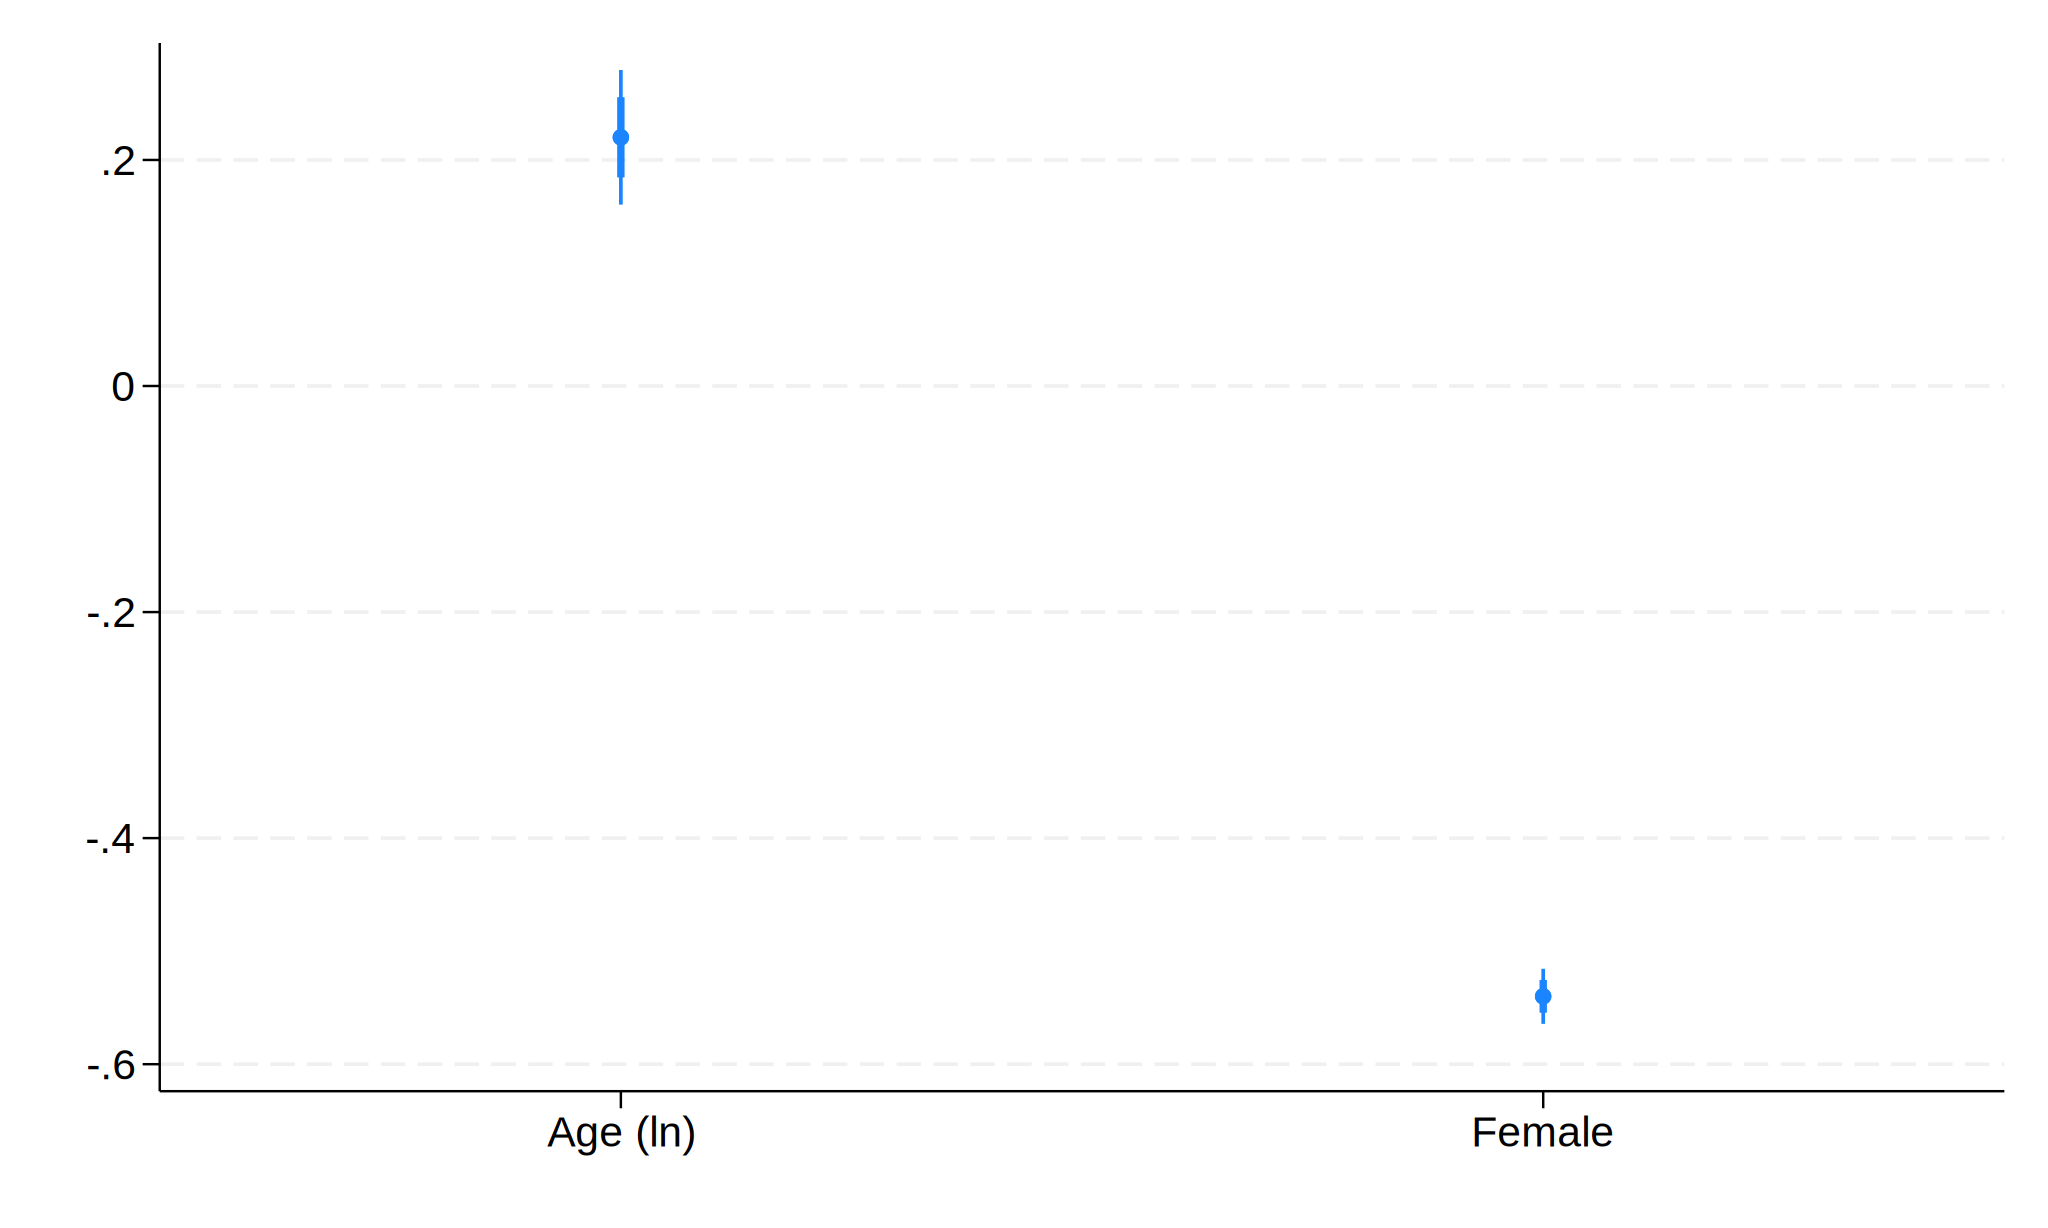

In [12]:
%%stata

regress logearn logage sexdummy
coefplot, drop(_cons) graphregion(color(white)) levels(99.9 95) vertical
graph export graph1.jpg, as(jpg) replace

## 12.3 Wrap Up
We have learned in this module how to store regression output in a clear and organized manner using the command `etable` and how to plot regression coefficients using the command `coefplot`.

Remember to check the Stata documentation when creating graphs and exporting tables. The documentation can be your best ally if you end up using it.

Here is a summary of the new commands we have seen in this module.

|Command| Function|
|-------|---------|
|`etable, export(filename)`|It exports the regression output to a file named *filename*.|
|`coefplot`|It plots regression coefficients and their 95% confidence intervals.|

## 12.4 Video tutorial

Click on the image below for a video tutorial on this module.

[![Exporting Regression Output](img/stata12.png)](https://learning.media.ubc.ca/media/Notebook+12+-+Exporting+Regression+Output/0_9ovgsikg)

## References 

[etable manual](https://www.stata.com/manuals/retable.pdf) <br>
[How to use coefplot](https://repec.sowi.unibe.ch/stata/coefplot/getting-started.html) <br>